<a href="https://colab.research.google.com/github/MinhQuang31751/Python/blob/main/tags_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**3.BỘ DỮ LIỆU CỦA TAGS**

## 3.1.Data cleaing

###**3.1.1 Chuẩn bị và Kiểm tra an toàn**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PTDL_PY/Bản sao của tags.csv')
display(df)

,userId,movieId,tag,timestamp
0,22,26479,Kevin Kline,1583038886
1,22,79592,misogyny,1581476297
2,22,247150,acrophobia,1622483469
3,34,2174,music,1249808064
4,34,2174,weird,1249808102
...,...,...,...,...
2000067,162279,90645,Rafe Spall,1320817734
2000068,162279,91079,Anton Yelchin,1322337407
2000069,162279,91079,Felicity Jones,1322337400
2000070,162279,91658,Rooney Mara,1325828398


###**3.1.2. Xử lý Giá trị Bị thiếu (Missing Values)**

In [ ]:
print(df.isnull().sum())


userId        0
movieId       0
tag          17
timestamp     0
dtype: int64


**Đánh giá**

- cột tag có 17 giá trị bị null

###**3.1.3. Loại bỏ các giá trị bị thiếu**

In [ ]:
df.dropna(subset=['tag'], inplace=True)

###**3.1.4. Kiểm tra lại Dữ liệu sau khi Làm sạch**

In [ ]:
print(df.isnull().sum())

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000055 entries, 0 to 2000071
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   userId     int64 
 1   movieId    int64 
 2   tag        object
 3   timestamp  int64 
dtypes: int64(3), object(1)
memory usage: 76.3+ MB


##**3.2.EDA Và Trực Quan Hóa Dữ Liệu**

###**3.2.1.TOP 10 TAG PHỔ BIẾN**

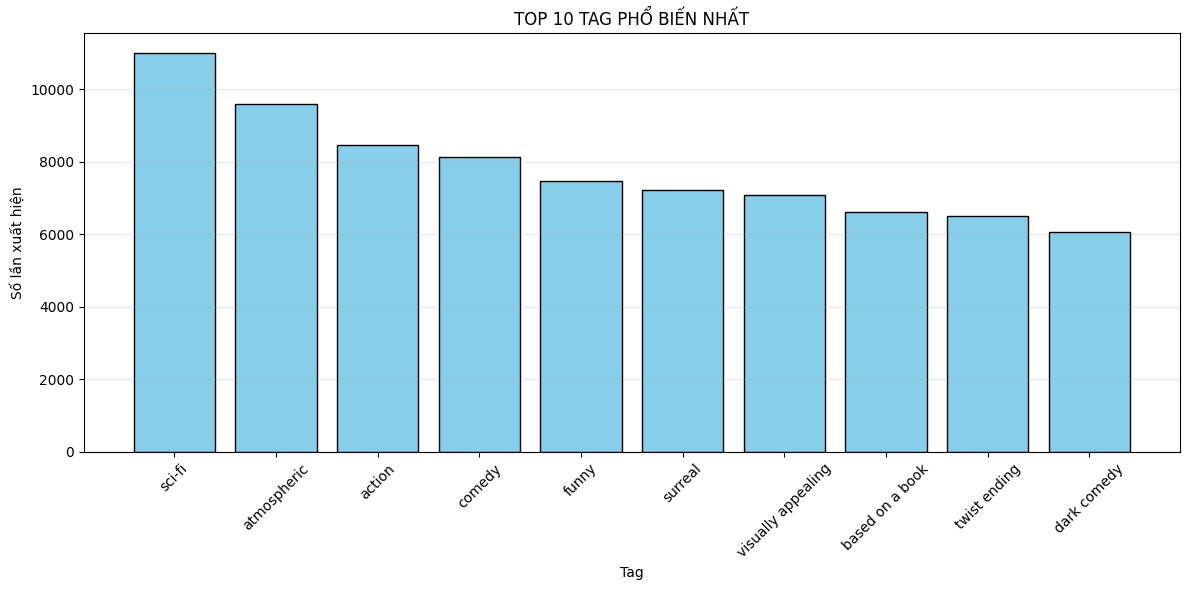

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập style đơn giản
plt.style.use('default')

# 1. BIỂU ĐỒ CỘT - TOP 10 TAG PHỔ BIẾN
plt.figure(figsize=(12, 6))
tag_counts = df['tag'].value_counts().head(10)
plt.bar(tag_counts.index, tag_counts.values, color='skyblue', edgecolor='black')
plt.title('TOP 10 TAG PHỔ BIẾN NHẤT')
plt.xlabel('Tag')
plt.ylabel('Số lần xuất hiện')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

###**3.2.2.Top 10 movie được tag nhiều nhất**

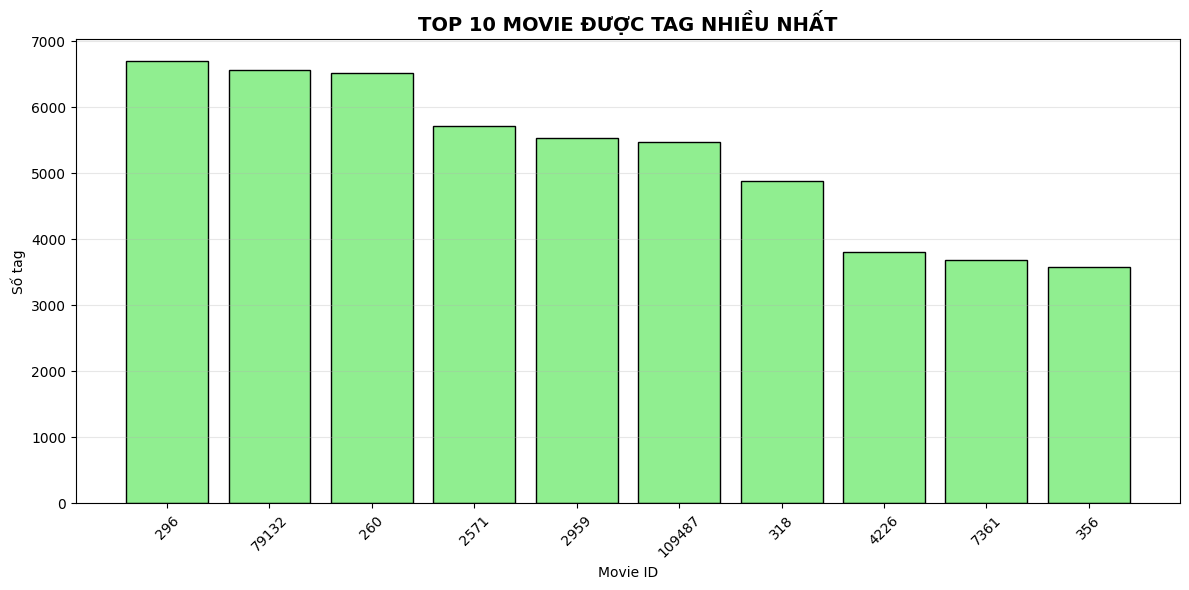

In [ ]:
# Top 10 movie được tag nhiều nhất
movie_counts = df['movieId'].value_counts().head(10)

# Create a new figure and axes for this plot
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(movie_counts.index.astype(str), movie_counts.values, color='lightgreen', edgecolor='black')
ax.set_title('TOP 10 MOVIE ĐƯỢC TAG NHIỀU NHẤT', fontsize=14, fontweight='bold')
ax.set_xlabel('Movie ID')
ax.set_ylabel('Số tag')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

###**3.2.3.BIỂU ĐỒ TRÒN - PHÂN BỐ ĐỘ DÀI TAG**

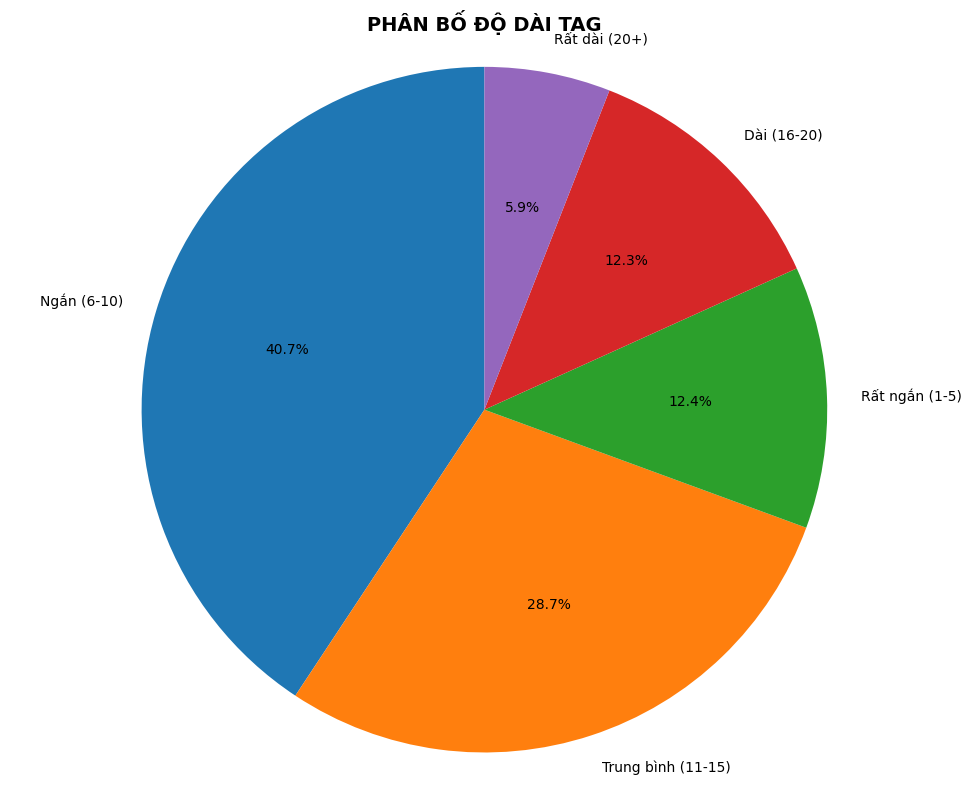

In [ ]:

# 4. BIỂU ĐỒ TRÒN - PHÂN BỐ ĐỘ DÀI TAG
plt.figure(figsize=(10, 8))
df['tag_length'] = df['tag'].str.len()
length_categories = pd.cut(df['tag_length'],
                          bins=[0, 5, 10, 15, 20, 100],
                          labels=['Rất ngắn (1-5)', 'Ngắn (6-10)', 'Trung bình (11-15)',
                                 'Dài (16-20)', 'Rất dài (20+)'])
length_counts = length_categories.value_counts()
plt.pie(length_counts.values, labels=length_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('PHÂN BỐ ĐỘ DÀI TAG', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

###**3.2.4.bIỂU ĐỒ DONUT - TỔNG QUAN DỮ LIỆU**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

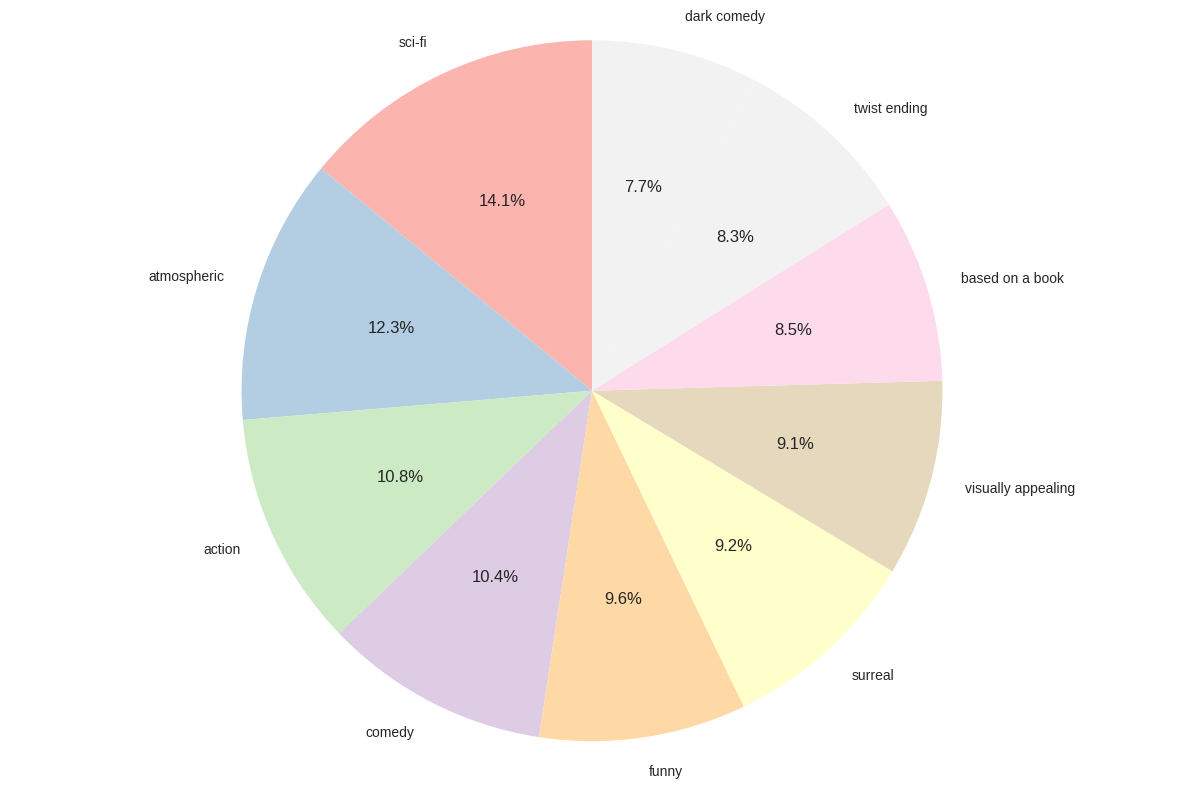

In [ ]:
# 2. BIỂU ĐỒ TRÒN - TOP 10 TAG
plt.figure(figsize=(12, 8))
tag_counts = df['tag'].value_counts().head(10)
colors = plt.cm.Pastel1(range(len(tag_counts)))

plt.pie(tag_counts.values, labels=tag_counts.index,
        colors=colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.tight_layout()
plt.show()